In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split

# Assignment 4 - Classification

For this assignment, you'll need to perform a classification on a dataset, as well as do some prep work on the data. 

The exact steps of what you need to do are flexible and up to you to some degree, however you should consider some of the important things we've mentioned recently, such as:
<ul>
<li> Is the target balanced?
<li> Are there missing or erroneous values?
<li> Are there categorical or numerical features?
<li> Is there colinearity?
<li> Are there outliers?
<li> Should we normalize? 
<li> Do the distributions of the features give any indication that some may need work? 
</ul>

Basically, the data is in the original, potentially dirty, format, and you need to find what should be cleaned, and do the cleaning. There is not one "right" answer to what has to be done, and you'll probably need to do it with at least something of an iterative process - find an issue, correct it, check the data, repeat.

<b>The target that we are predicting is the loan_status. </b>

## Grading

The grades will be broken down as follows:
<ul>
<li> <b>30%</b> - a working predictive model with a reasonable level of accuracy. 
    <ul>
    <li> For the accuracy part, it will not be explicitly graded, but compared to all the others. If you're in the same general range, that's good - if yours is drastically less accurate (or, I guess more accurate), then I'll adjust. There won't be a comparison of "this person is 72.3% and this person is only 71.8% accurate, they fail."
    <li> This data is larger than most of the small sample sets, so random variations due to train-test splits shouldn't be too bad. (If you're a keener you could loop)
    <li> I will use the F1 score as the accuracy metric. 
    </ul>
<li> <b>40%</b> - a clear and readable description of what steps you took to prepare the data, and a brief not on the rationale behind it. Did you do a log transformation to a skewed feature, did you remove outliers, did you remove a feature that has a lot of missing values? Please put this somewhere obvious and readable, consider the goal of the assignment to explain your process to me. 
    <ul>
    <li> E.g. "The target data was imbalanced, so I tried several resampling methods and chose the one with the highest accuracy of the resulting model", "the feature X had the same value for 95% of records, so I dropped it". 
    <li> In this, please also state if you see a group that appears to be a good credit risk, and a group that is a bad credit risk, and indicate the evidence showing that. Please do this other than the most simplistic way - more money = better credit. If there are no such groups, state why you think this. This will likely be about 3 - 5 statements or points, you should provide evidence from the data, but it does not need to be an essay. (You may want to consider this question after you're pretty much done with the data prep and modelling.)
    </ul>
<li> <b>30%</b> - allowing your model to be "deployed". At the bottom of this file there is a small block of code to load in some test data (that I have), and calculate your accuracy. Your contribution to this part is to have a model that is ready to make predictions. Some specifics to consider:
    <ul>
    <li> The test data will be in exactly the same format as the dataset you're given. So any steps that you took to prepare your data for modelling will need to be mirroed here, so the new  data can be predicted. The easiest way to do this is to use a pipeline, but it is up to you. Remember the model only accepts data that is in a certain format - the one that you had the data in when it was trained, so when making predictions you need to make sure that is true. 
    <li> Since I'm providing test data, and your task is to just create a model, think about how that might impact your train-test splitting, both as you're developing and for the final product. 
    <li> Once the model is trained it should predict any data that is in the right format, so I should be able to provide any proper dataset, click run on that testing cell, and get predictions. I will not be doing anything that will purposefully make this harder or trickier, like including data that has errors or is in the wrong format, I just split the entire set of data, reserved part of it to test accuracy, and gave the rest to you. Things that you've changed (e.g. dropping a column, one-hot encoding) do need to be replicated at some point before the model can accept the new data to predict. In general we <b>do</b> want to check in our processing that our input is valid, this is kind of a junior introduction to that. 
    </ul>
</ul

## Load Credit Data

In [24]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26967,27,120000,MORTGAGE,3.0,PERSONAL,B,14000,11.99,0,0.12,N,10
1,8449,24,58000,MORTGAGE,8.0,DEBTCONSOLIDATION,A,15700,7.90,0,0.27,N,3
2,20983,30,45000,RENT,11.0,MEDICAL,C,5000,12.73,1,0.11,Y,8
3,19612,35,35000,MORTGAGE,5.0,EDUCATION,B,5600,11.49,0,0.16,N,6
4,30371,38,55000,RENT,0.0,EDUCATION,C,6500,11.03,0,0.12,Y,12


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  26064 non-null  int64  
 1   person_age                  26064 non-null  int64  
 2   person_income               26064 non-null  int64  
 3   person_home_ownership       26064 non-null  object 
 4   person_emp_length           25350 non-null  float64
 5   loan_intent                 26064 non-null  object 
 6   loan_grade                  26064 non-null  object 
 7   loan_amnt                   26064 non-null  int64  
 8   loan_int_rate               23575 non-null  float64
 9   loan_status                 26064 non-null  int64  
 10  loan_percent_income         26064 non-null  float64
 11  cb_person_default_on_file   26064 non-null  object 
 12  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(6), object

In [26]:
# SOME DATA PREP

# Delete column
df = df.drop(df.columns[[0]],axis=1)
# Deleting null values
df = df.dropna()
# Number of records and fields
print('Records - Fields',df.shape)
# Name of the columns
print('Fields',list(df.columns))



Records - Fields (22919, 12)
Fields ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


In [27]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,27,120000,MORTGAGE,3.0,PERSONAL,B,14000,11.99,0,0.12,N,10
1,24,58000,MORTGAGE,8.0,DEBTCONSOLIDATION,A,15700,7.90,0,0.27,N,3
2,30,45000,RENT,11.0,MEDICAL,C,5000,12.73,1,0.11,Y,8
3,35,35000,MORTGAGE,5.0,EDUCATION,B,5600,11.49,0,0.16,N,6
4,38,55000,RENT,0.0,EDUCATION,C,6500,11.03,0,0.12,Y,12


In [28]:
# INPUT VARIABLES
# 1. person_home_ownership (categorical : RENT, MORTGAGE, OWN, OTHER)
print(df.value_counts("person_home_ownership"),"\n")
# 2. person_emp_length(numeric)
# 3. loan_intent (categorical :EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT)
print(df.value_counts("loan_intent"),"\n")
# 4. loan_amnt(numeric)
# 5. loan_int_rate(numeric)
# 6. loan_percent_income(numeric)
# 7. cb_person_default_on_file (categorical: N, Y)
print(df.value_counts("cb_person_default_on_file"),"\n")
# 8. cb_person_cred_hist_length(numeric)

# Predict variable : loan_status


person_home_ownership
RENT        11590
MORTGAGE     9488
OWN          1764
OTHER          77
dtype: int64 

loan_intent
EDUCATION            4524
MEDICAL              4258
VENTURE              4023
PERSONAL             3875
DEBTCONSOLIDATION    3620
HOMEIMPROVEMENT      2619
dtype: int64 

cb_person_default_on_file
N    18790
Y     4129
dtype: int64 



In [29]:
# DATA EXPLORATION
df["loan_status"].value_counts()


0    17973
1     4946
Name: loan_status, dtype: int64

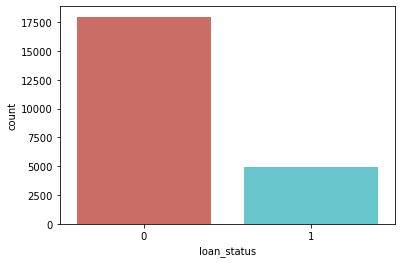

In [58]:
sns.countplot(x="loan_status",data=df, palette="hls")
plt.show()


In [31]:
# CHECK FOR BALANCE
count_0 = len(df[df['loan_status'] == 0])
count_1 = len(df[df['loan_status'] == 1])
pct_of_0 = count_0/(count_0+count_1)
print("percentage loan_status = 0", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("percentage loan_status = 1", pct_of_1*100)


percentage loan_status = 0 78.41965181726951
percentage loan_status = 1 21.580348182730486


The ratio of loan_status =0 to loan_status =1 is 78:22. Our classes are imbalanced.

In [32]:
# Lets calculate means for the numerical variables to analize.
df.groupby("loan_status").mean()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,27.816836,71209.315473,4.972014,9288.001447,10.454476,0.148554,5.834363
1,27.430853,50258.851193,4.156086,11060.811767,13.147764,0.246367,5.658512


The average person employment length who has loan_status = 0, is higher than that person employment length with loan_status = 1 .
Loan interest rate is higher for person_emp_length with loan_status = 1 by ~3 points.
Percentage income is higuer for person_emp_length who has loan_status = 0.

In [33]:
# Calculate categorical means for other categorical variables such as person_home_ownership and loan_intent
# to get a more insights of the data.
df.groupby("person_home_ownership").mean()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_home_ownership,,,,,,,,
MORTGAGE,27.985245,81655.063976,5.878794,10642.611720,10.521071,0.124157,0.151257,5.897239
OTHER,27.000000,83595.727273,4.142857,10992.532468,11.980519,0.298701,0.181948,5.506494
OWN,27.706916,59367.391723,5.169501,9172.108844,10.951553,0.066327,0.185799,5.874150
RENT,27.536411,55437.541674,3.856946,8941.924072,11.463518,0.313028,0.182192,5.703969


In [34]:
df.groupby("loan_intent").mean()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
loan_intent,,,,,,,,
DEBTCONSOLIDATION,27.578177,66592.852762,4.740884,9655.303867,11.012704,0.279834,0.170923,5.698343
EDUCATION,26.594607,64954.969938,4.481653,9584.328028,10.990444,0.171088,0.169730,5.172193
HOMEIMPROVEMENT,29.093165,74784.282551,5.145094,10441.351661,11.216197,0.256586,0.163646,6.457045
MEDICAL,27.934946,61947.616252,4.745186,9347.898074,11.080507,0.266322,0.173109,5.898779
PERSONAL,28.220129,68566.874581,4.947613,9651.690323,11.007874,0.198452,0.169151,6.114839
VENTURE,27.587124,66660.022123,4.879195,9639.267959,10.969137,0.145165,0.169212,5.741486


Text(0, 0.5, 'Frequency')

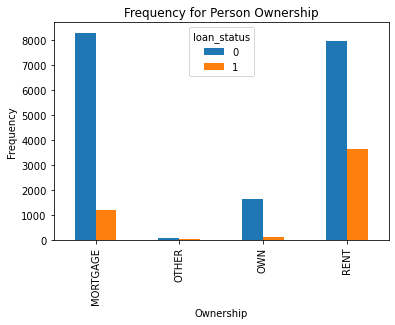

In [35]:
# Plot visualizations to check relation between variables.
pd.crosstab(df.person_home_ownership, df.loan_status).plot(kind='bar')
plt.title('Frequency for Person Ownership')
plt.xlabel('Ownership')
plt.ylabel('Frequency')



The frequency is greatly influenced by the ownership. As a result, the outcome variable can be well predicted by the ownership.

Text(0, 0.5, 'Frequency')

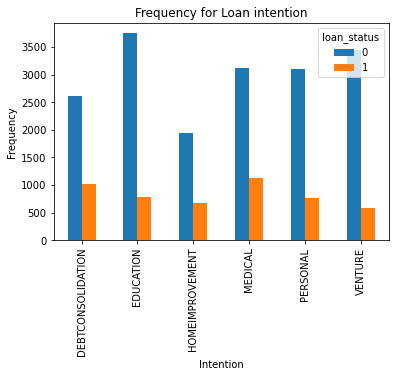

In [36]:
# Plot visualizations to check relation between variables.
pd.crosstab(df.loan_intent, df.loan_status).plot(kind='bar')
plt.title('Frequency for Loan intention')
plt.xlabel('Intention')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

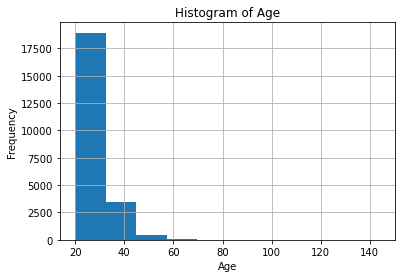

In [37]:
# Plot visualizations to check relation between variables.
df.person_age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


Most of the loan consumers are in the age range of 20–30.

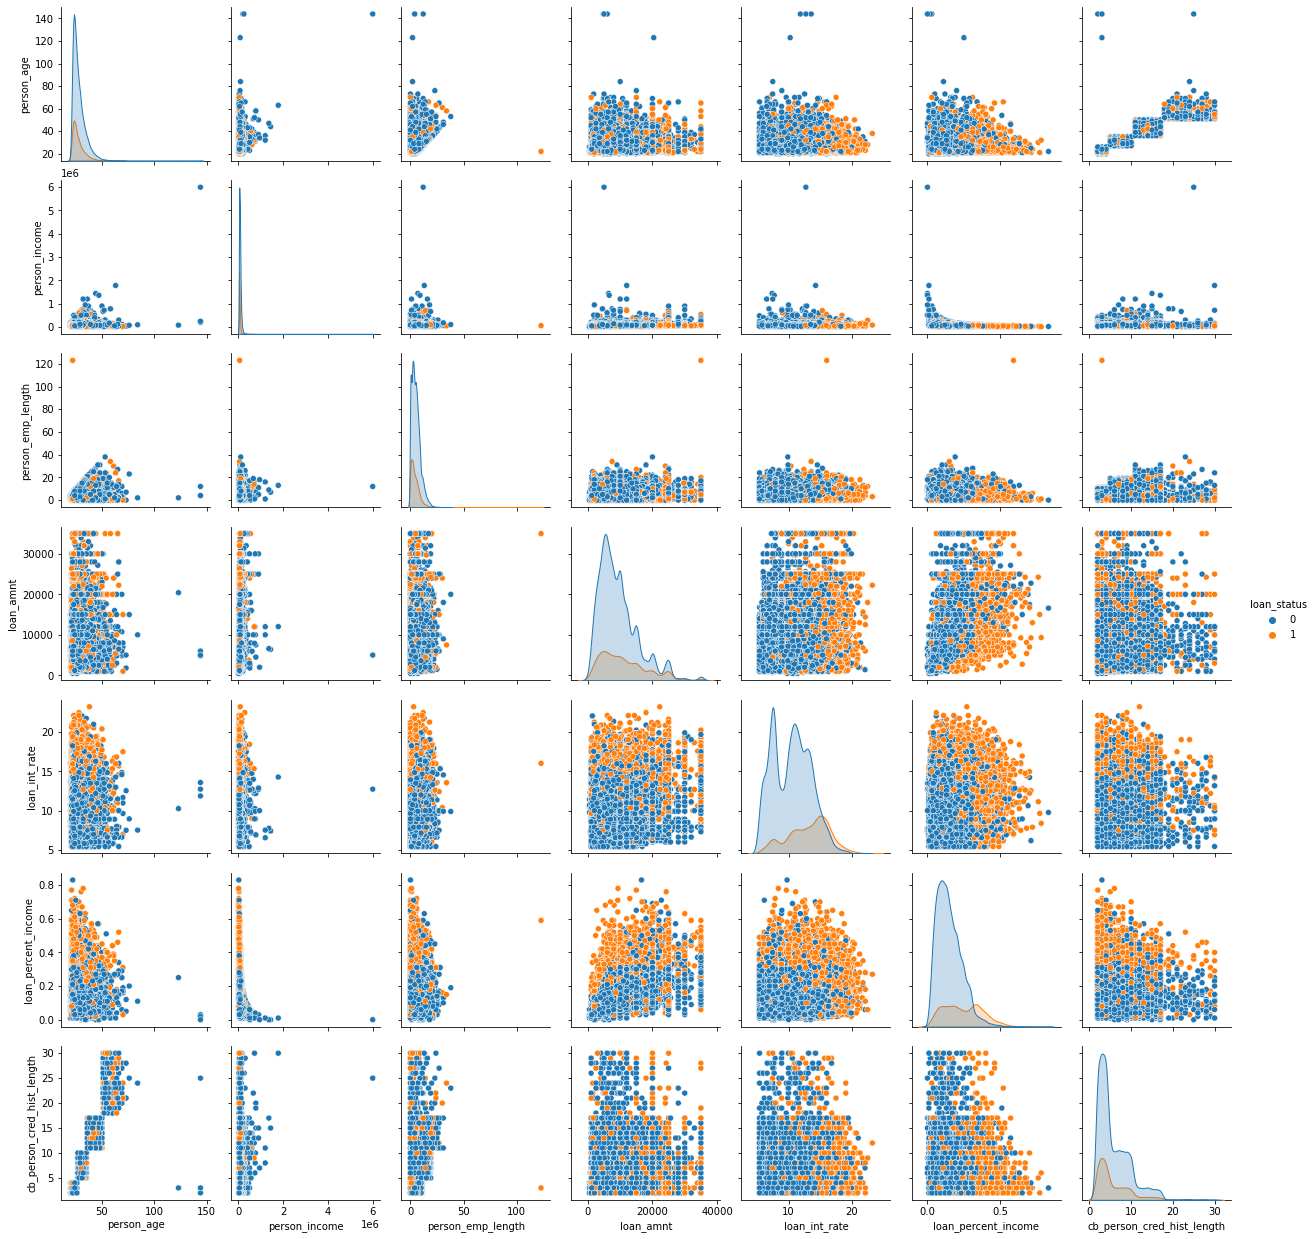

In [59]:
# Visualize numeric variable
sns.pairplot(df, hue="loan_status")


In [39]:
# Encode the categorical varaiables.
df2_ = pd.get_dummies(df, drop_first=True)
df2_.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,27,120000,3.0,14000,11.99,0,0.12,10,0,0,...,0,1,0,1,0,0,0,0,0,0
1,24,58000,8.0,15700,7.90,0,0.27,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,45000,11.0,5000,12.73,1,0.11,8,0,0,...,1,0,0,0,1,0,0,0,0,1
3,35,35000,5.0,5600,11.49,0,0.16,6,0,0,...,0,0,0,1,0,0,0,0,0,0
4,38,55000,0.0,6500,11.03,0,0.12,12,0,0,...,0,0,0,0,1,0,0,0,0,1


In [42]:
df2_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22919 entries, 0 to 26063
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   22919 non-null  int64  
 1   person_income                22919 non-null  int64  
 2   person_emp_length            22919 non-null  float64
 3   loan_amnt                    22919 non-null  int64  
 4   loan_int_rate                22919 non-null  float64
 5   loan_status                  22919 non-null  int64  
 6   loan_percent_income          22919 non-null  float64
 7   cb_person_cred_hist_length   22919 non-null  int64  
 8   person_home_ownership_OTHER  22919 non-null  uint8  
 9   person_home_ownership_OWN    22919 non-null  uint8  
 10  person_home_ownership_RENT   22919 non-null  uint8  
 11  loan_intent_EDUCATION        22919 non-null  uint8  
 12  loan_intent_HOMEIMPROVEMENT  22919 non-null  uint8  
 13  loan_intent_MEDI

In [45]:
# Make arrays from data
dfY = df2_["loan_status"]
dfX = df2_.drop(columns={"loan_status"})

x = np.array(dfX)
y = np.array(dfY).reshape(-1, 1)
x.shape, y.shape


((22919, 22), (22919, 1))

In [51]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


In [47]:
# Create scaler and choose method.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Comment one out, use the other
#scaler = StandardScaler()
scaler = MinMaxScaler()



In [52]:
#Standardize or normalize
# Use training data to fit the scaler, then apply that predefined scale to the test data
x2 = scaler.fit_transform(X_train)
X_trans2 = scaler.transform(X_test)


In [53]:
# Train model
model = LogisticRegression().fit(x2, y_train.ravel())

# Make predictions
preds = model.predict(X_trans2)


In [50]:
def convert_prob_to_label(prob, cutoff=0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label


F1: 0.6527728717767572
Acc: 0.8700423056583818


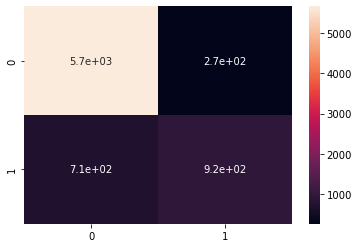

In [57]:
#Make predictions and examine accuracy
preds = model.predict(X_trans2)

labels = convert_prob_to_label(np.array(preds))
conf_matrix = confusion_matrix(y_test,labels)
sns.heatmap(conf_matrix, annot=True)

print("F1:",f1_score(y_test, labels))
print("Acc:",accuracy_score(y_test, labels))

### Accuracy Test

Replace the green part with whatever you need to transform the fresh data into the format needed for your model to predict. 

<b>Note:</b> you could test and make sure that things are working OK here by taking part of your dataset, saving it in a separate CSV, and running it through here as a piece of test data. The accuracy results would be useless, but you'd confirm that the model works properly. 

In [40]:
#d_test = pd.read_csv("test.csv")

######################
# Insert whatever you need to do to prep the data here. 
# It might be nothing if you have a big pipeline. 
# Ensure that at the end your data is in two arrays - xtest and ytest
# Ensure the name of your final model is "model"
# Each should contain the ENTIRE x or y dataset in the test data. 
#
# This part should be reusable - any dataset in this format should just run
# and generate predictions and accuracy stats. 
# Please DO NOT do any train-test splitting here. 
#######################

# This should work once you're done, as is. 
# uncomment the stuff below when ready to run.
#print("F1:",f1_score(ytest, prediction_labels))
#conf_matrix = confusion_matrix(ytest, prediction_labels)
#sns.heatmap(conf_matrix, annot=True)